In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


In [3]:
df = pd.read_csv('admissions.csv')
df.sample(10)

,admit,gpa,gre
583,1,3.188329,711.261780
435,1,3.086840,720.697055
190,0,3.008434,438.537099
626,1,3.486941,667.265346
201,0,3.619504,463.774416
122,0,3.085012,594.876306
370,0,3.255931,621.267215
63,0,3.455818,546.030157
570,1,3.549322,645.261912
417,1,3.757647,678.265356


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


In [5]:
df.describe()

,admit,gpa,gre
count,644.000000,644.000000,644.000000
mean,0.378882,3.239936,612.923057
std,0.485486,0.291907,76.637990
min,0.000000,2.177100,390.363563
25%,0.000000,3.045036,560.596793
50%,0.000000,3.234650,612.104848
75%,1.000000,3.448415,663.094697
max,1.000000,4.000000,800.000000


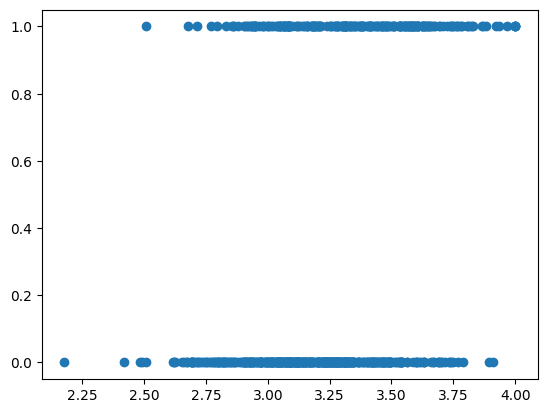

In [6]:
plt.scatter(df.gpa , df.admit)

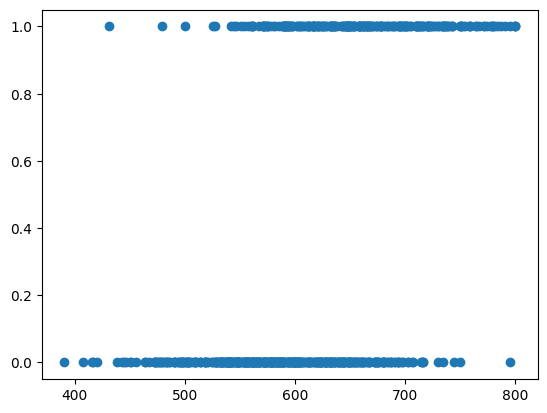

In [7]:
plt.scatter(df.gre , df.admit)

## Model Building

In [9]:
lr = LinearRegression()
lr.fit(df[['gpa']] , df.admit)

LinearRegression()

In [10]:
log = LogisticRegression()
log.fit(df[['gpa']] , df.admit)

LogisticRegression()

In [12]:
y_pred_gpa = log.predict_proba(df[['gpa']])
y_pred_gpa

array([[0.66343633, 0.33656367],
       [0.53967962, 0.46032038],
       [0.84160275, 0.15839725],
       ...,
       [0.69368514, 0.30631486],
       [0.46457162, 0.53542838],
       [0.47350995, 0.52649005]])

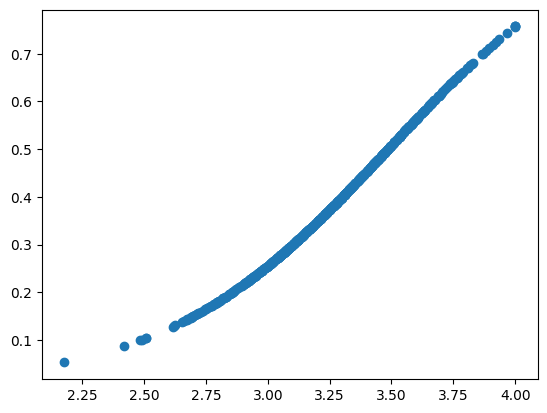

In [26]:
plt.scatter(df.gpa , y_pred_gpa[:,1])

In [16]:
fitted_gpa = log.predict(df[['gpa']]) 

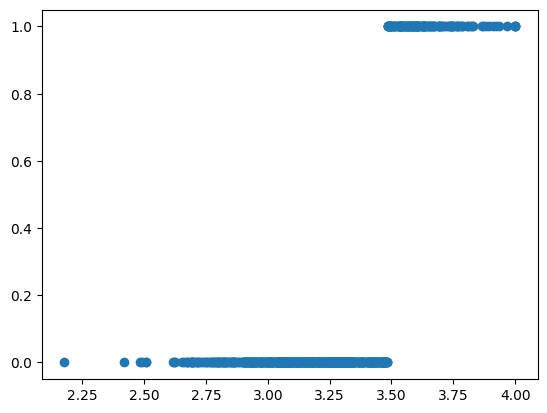

In [17]:
plt.scatter(df['gpa'],fitted_gpa)

### 3.5 is a cutoff gpa for getting admission

In [18]:
log_gre = LogisticRegression()
log_gre.fit(df[['gre']] , df.admit)

LogisticRegression()

In [20]:
y_pred_gre = log_gre.predict_proba(df[['gre']])
y_pred_gre

array([[0.72950216, 0.27049784],
       [0.58321164, 0.41678836],
       [0.84555697, 0.15444303],
       ...,
       [0.18759357, 0.81240643],
       [0.69133345, 0.30866655],
       [0.74683515, 0.25316485]])

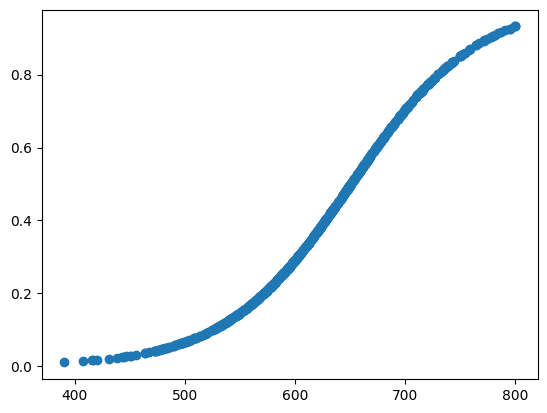

In [21]:
plt.scatter(df.gre , y_pred_gre[:,1])

In [23]:
fitted_gre = log_gre.predict(df[['gre']]) 

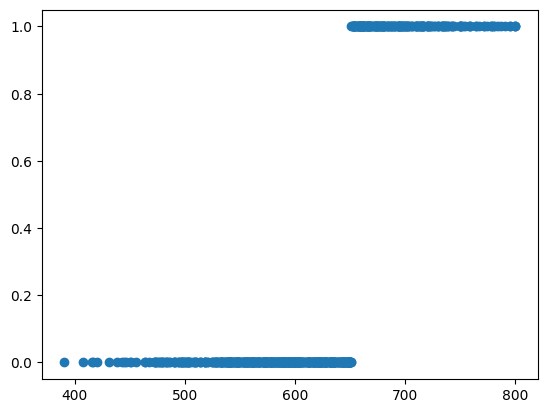

In [24]:
plt.scatter(df['gre'],fitted_gre)

### 650 is cutoff marks in gre to get a admission

## Comparing the Performance of model


In [27]:
sum((fitted_gpa == df['admit'])/df.shape[0])

0.7267080745341543

In [28]:
sum((fitted_gre == df['admit'])/df.shape[0])

0.7267080745341543

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
confusion_matrix(df.admit,fitted_gre)

array([[336,  64],
       [112, 132]], dtype=int64)

In [32]:
confusion_matrix(df.admit,fitted_gpa)

array([[336,  64],
       [112, 132]], dtype=int64)

# Combine Model

In [33]:
logic2 = LogisticRegression()
logic2.fit(df[['gpa','gre']],df.admit)

LogisticRegression()

In [34]:
y_pred_gregpa = logic2.predict_log_proba(df[['gpa','gre']])

In [35]:
fitted_gregpa = logic2.predict(df[['gpa','gre']])

In [36]:
sum((fitted_gregpa == df['admit'])/df.shape[0])

0.7872670807453335

### GPA and GRE can predict admission chances in more better than only GPA or GRE